In [ ]:
"""
Problem Statement No. 03 
Write a Python program to display some basic statistical details like percentile, mean, standard deviation etc. of the 
species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-virginica’ of iris.csv dataset. 
Calculate the measures of variability. Calculate and provide the visualization of the Correlation among the variables. 
"""

In [3]:
import pandas as pd

In [50]:
df = pd.read_csv('Iris.csv')

In [51]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.drop('Id',axis = 1 ,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
species_group = df.groupby('Species')

In [16]:
species_group

In [17]:
species_group.mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [18]:
species_group.median()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [19]:
species_group.std()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [20]:
species_group.var()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


In [21]:
species_group.describe()

SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [36]:
def cov(x , y):
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum(sub_x[i] * sub_y[i] for i in range(len(sub_x)))
    denominator = len(x) - 1
    return numerator / denominator

In [24]:
df['SepalWidthCm'] = df['SepalWidthCm'].astype(int)

In [25]:
df['SepalLengthCm'] = df['SepalLengthCm'].astype(int)

In [30]:
df['PetalLengthCm'] = df['PetalLengthCm'].astype(int)

In [28]:
df['PetalWidthCm'] = df['PetalWidthCm'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SepalLengthCm  150 non-null    int32 
 1   SepalWidthCm   150 non-null    int32 
 2   PetalLengthCm  150 non-null    int32 
 3   PetalWidthCm   150 non-null    int32 
 4   Species        150 non-null    object
dtypes: int32(4), object(1)
memory usage: 3.6+ KB


In [40]:
cov(df['SepalLengthCm'],df['SepalWidthCm'])

-0.05709172259507802

In [41]:
cov(df['SepalLengthCm'],df['PetalLengthCm'])

1.1759284116331108

In [42]:
cov(df['SepalLengthCm'],df['PetalWidthCm'])

0.41691275167785247

In [43]:
cov(df['SepalWidthCm'],df['PetalLengthCm'])

-0.3607158836689047

In [44]:
cov(df['SepalWidthCm'],df['PetalWidthCm'])

-0.11020134228187918

In [45]:
cov(df['PetalLengthCm'],df['PetalWidthCm'])

1.1506040268456363

In [46]:
import seaborn as sns

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

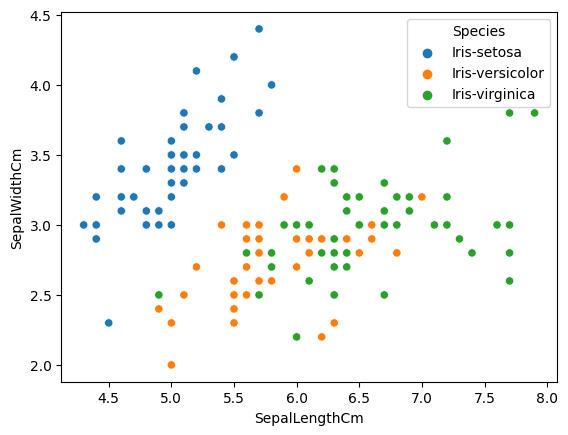

In [53]:
sns.scatterplot(x='SepalLengthCm' , y='SepalWidthCm' ,data=df,hue='Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

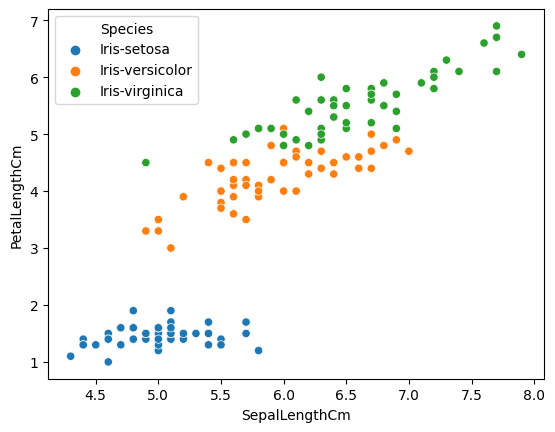

In [54]:
sns.scatterplot(x='SepalLengthCm' ,y='PetalLengthCm' , data=df ,hue='Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

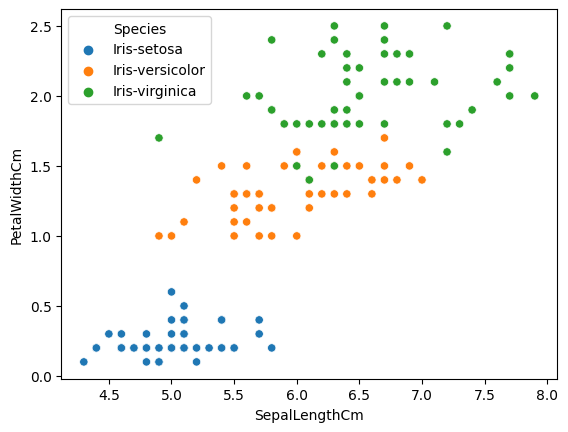

In [56]:
sns.scatterplot(x='SepalLengthCm' ,y='PetalWidthCm' , data=df ,hue='Species')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

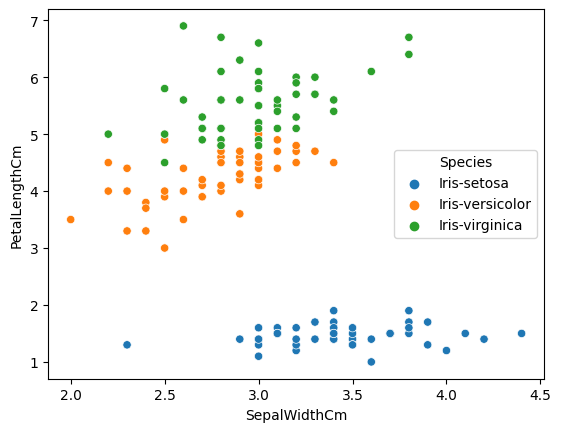

In [58]:
sns.scatterplot(x='SepalWidthCm',y='PetalLengthCm',data=df,hue='Species')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

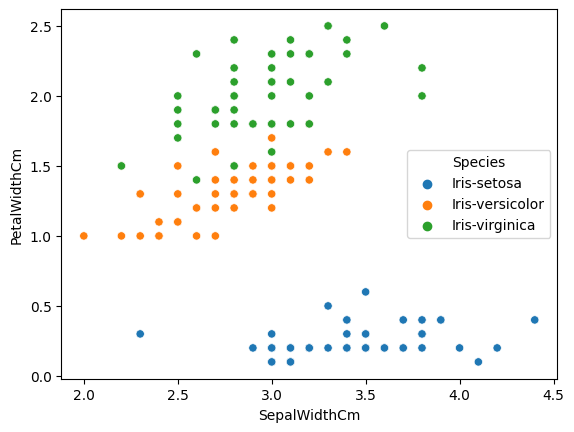

In [59]:
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=df,hue='Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

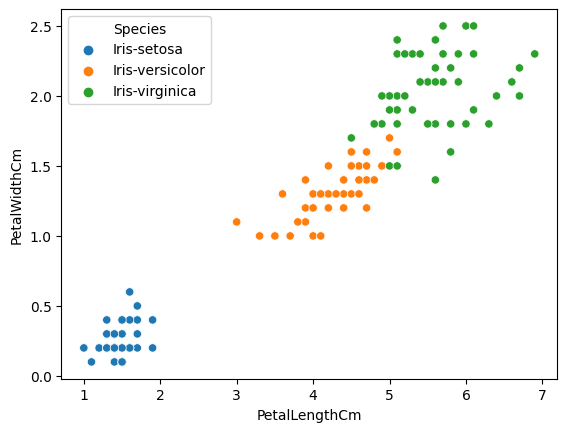

In [60]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species')

In [61]:
cormatrix = df.corr(numeric_only=True)
round(cormatrix,4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.0000,0.7167,-0.3977,0.8827,0.8998
SepalLengthCm,0.7167,1.0000,-0.1094,0.8718,0.8180
SepalWidthCm,-0.3977,-0.1094,1.0000,-0.4205,-0.3565
PetalLengthCm,0.8827,0.8718,-0.4205,1.0000,0.9628
PetalWidthCm,0.8998,0.8180,-0.3565,0.9628,1.0000


<AxesSubplot:>

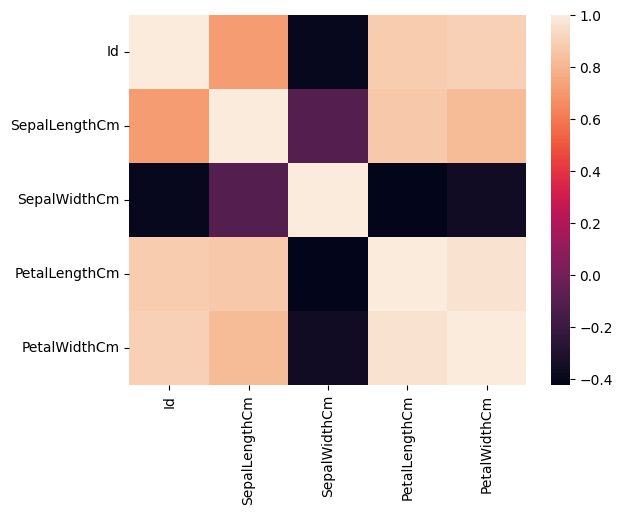

In [62]:
sns.heatmap(cormatrix)